In [1]:
import sys
sys.path.insert(0,'../PyGame-Learning-Environment/')
from ple.games.catcher_discrete import Catcher
from ple import PLE
import numpy as np
import time
import matplotlib.pyplot as plt

pygame 2.0.1 (SDL 2.0.14, Python 3.8.11)
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
def process_state(state):
        return np.array([ state.values() ])

In [3]:
game = Catcher(width=512, height=512, init_lives=3)
p = PLE(game, display_screen=True, state_preprocessor=process_state)

In [4]:
p.init()
p.getGameState()

array([dict_values([179, 85, 0])], dtype=object)

In [5]:
p.reset_game()

In [6]:
p.getGameState()

array([dict_values([179, 255, 0])], dtype=object)

In [27]:
p.act(None)
p.getGameState()

array([dict_values([178, 85, 0])], dtype=object)

In [138]:
p.score()

1.0

In [97]:
 p.game_over()

True

In [77]:
p.getGameState()

array([dict_values([8, 425, 0])], dtype=object)

In [13]:
p.act(97)

0

In [14]:
state = list(p.getGameState()[0])
names= ["player x position:","; players velocity:","; fruits x position:","; fruits y position:"]
result = ' '.join([str(i) for e in  zip(names, state) for i in e])
print(result)

player x position: 389 ; players velocity: -19.3536 ; fruits x position: 183 ; fruits y position: -56


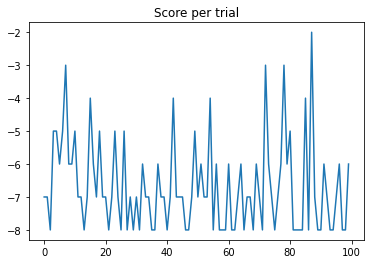

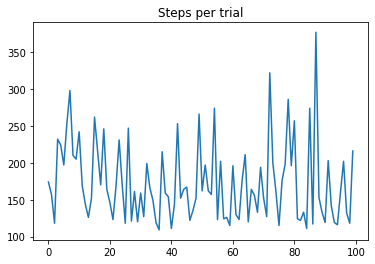

In [15]:
score = []
steps = []
nb_frames = 1000

for trial in range(100):
    reward = 0.0
    p.reset_game()
    for i in range(nb_frames):
        if p.game_over():
            #print(f"Game over step {i}")
            break

        state = p.getGameState()
        action = np.random.choice(actions)
        reward = p.act(action)
        #print("action ",action,"; reward ", reward, "; score ",p.score(), "; state ", state)
    score.append(p.score())
    steps.append(i)
    
plt.plot(score)
plt.title("Score per trial")
plt.show()
plt.title("Steps per trial")
plt.plot(steps)
plt.show()